In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

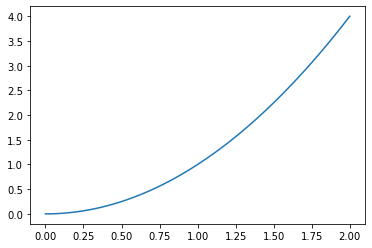

In [3]:
x = np.linspace(0,2)
y = x**2

plt.figure()
plt.plot(x,y)
plt.show()


x,y = np.loadtxt('/global/cscratch1/sd/james12/info.csv', delimiter = ',', unpack=True)



# Downloading Illustris Data to NERSC

In [14]:
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"2954d7d78fa87b44d26380f0d328d55e"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [15]:
r = get(baseUrl)

In [19]:
r.keys()

r['simulations'][0]


names = [sim['name'] for sim in r['simulations']]
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

In [23]:
i = names.index('Illustris-3')
i

sim = get(r['simulations'][i]['url'])
sim.keys()


dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

# Using Illustris Data

In [24]:
sim['num_dm']

94196375

In [2]:
import illustris_python as il



In [4]:
# basePath = './Illustris-3/output/'

basePath = '../../../cscratch1/sd/james12/Illustris-3/output/'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [10]:
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad'])

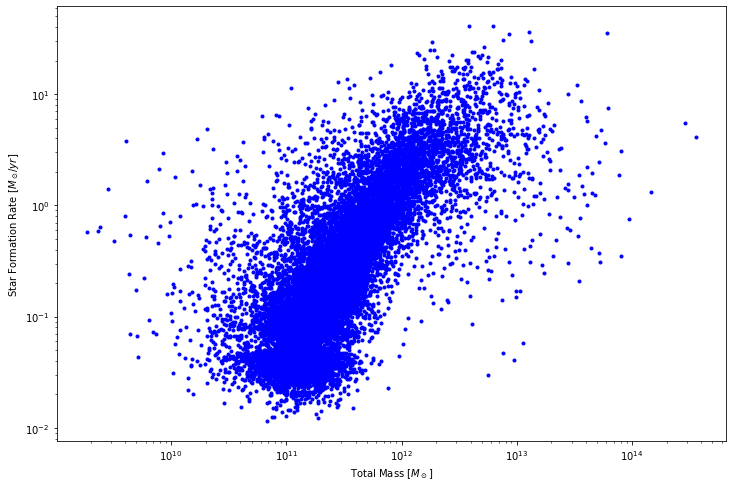

In [11]:
mass_msun = subhalos['SubhaloMass'] * 1e10/0.704

plt.figure(figsize=(12,8))
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'], '.', c='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')
plt.show()

# Plotting Dark Matter

In [7]:
fields = ['Masses']
gas_mass = il.snapshot.loadSubset(basePath,135,'gas',fields=fields)
print(np.log10( np.mean(gas_mass,dtype='double')*1e10/0.704 ))

7.921601619405842


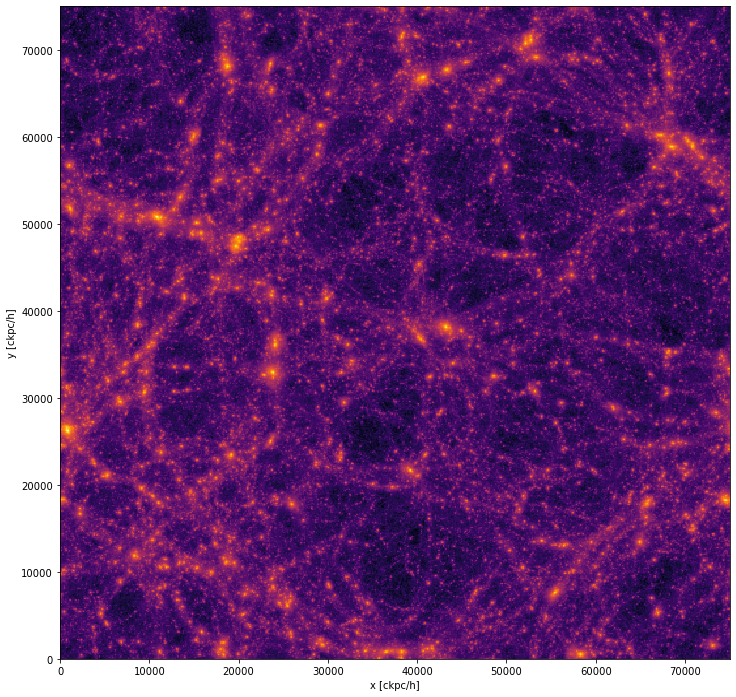

In [8]:
import matplotlib as mpl
dm_pos = il.snapshot.loadSubset(basePath,135,'dm',['Coordinates']);
plt.figure(figsize=(12,12))
plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=mpl.colors.LogNorm(), bins=512);
plt.xlim([0,75000])
plt.ylim([0,75000])
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.set_cmap('inferno')

In [32]:
print(dm_pos.shape)

94196375**(1/3)

(94196375, 3)


454.99999999999983

# Notes
- dm_pos is a catalog compatable with nbodykit
- take the first 10,000 rows instead 9.4e6 
- should be able to run FFT from nbodykit on this small subset 
- look at zack's slide on google slides -> create a power spectrum from painted grid mesh

In [9]:
import illustris_python as il
basePath = '../../../cscratch1/sd/james12/Illustris-3/output/'
dm_pos = il.snapshot.loadSubset(basePath,135,'dm',['Coordinates']); # Loading in data line

In [29]:
subset_catalog_dm = dm_pos[:100000,:]
print(subset_catalog_dm.shape)
print(type(subset_catalog_dm))
print(subset_catalog_dm)

(100000, 3)
<class 'numpy.ndarray'>
[[  901.51215 26285.375   18324.312  ]
 [  902.1493  26287.654   18323.568  ]
 [  898.7271  26288.53    18321.36   ]
 ...
 [  853.17004 26446.568   18207.564  ]
 [ 1002.93384 26465.666   18152.027  ]
 [  623.26636 26254.697   18216.713  ]]


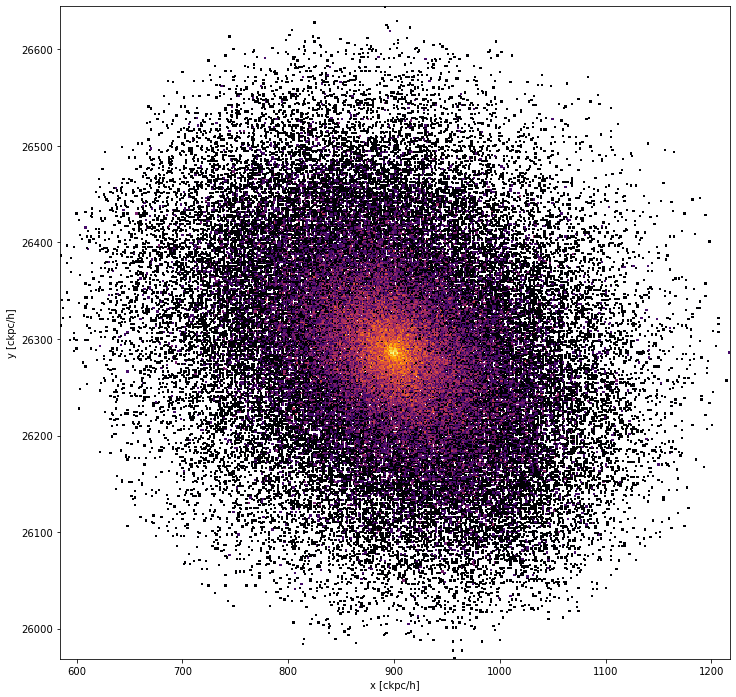

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.hist2d(subset_catalog_dm[:,0], subset_catalog_dm[:,1], norm=mpl.colors.LogNorm(), bins=512);
# plt.xlim([0,75000])
# plt.ylim([0,75000])
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.set_cmap('inferno')

# Creating an nbodykit Catalog

In [19]:
from nbodykit.lab import *

"""
Link for how to use meshes in NbodyKit
https://nbodykit.readthedocs.io/en/latest/mesh/common-operations.html
"""
dm_catalog = ArrayCatalog({'Position':dm_pos})
mesh = dm_catalog.to_mesh(Nmesh=128, BoxSize=106500)

#help(mesh)

In [20]:
mesh.preview()

array([[[0.01863426, 0.03910073, 0.0649792 , ..., 0.        ,
         0.        , 0.        ],
        [0.05971722, 0.09820222, 0.12764768, ..., 0.        ,
         0.        , 0.        ],
        [0.07556154, 0.11034585, 0.11481488, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.03232772, 0.07495929, 0.11534071, ..., 0.        ,
         0.        , 0.        ],
        [0.10217763, 0.17831588, 0.21498974, ..., 0.        ,
         0.        , 0.        ],
        [0.11008886, 0.19041754, 0.206094  , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(mesh.preview(axes=[0,0], Nmesh=128))

ValueError: axes don't match array

# Computing the Power Spectrum

In [28]:
result = FFTPower(mesh, mode='1d')

Pk = result.power
for k in Pk.attrs:
    print("%s = %s" %(k, str(Pk.attrs[k])))

Nmesh = [128 128 128]
BoxSize = [106000. 106000. 106000.]
Lx = 106000.0
Ly = 106000.0
Lz = 106000.0
volume = 1191016000000000.0
mode = 1d
los = [0, 0, 1]
Nmu = 1
poles = []
dk = 5.927533308659987e-05
kmin = 0.0
kmax = None
N1 = 94196375
N2 = 94196375
shotnoise = 12643968.517896788


# Plotting the Real Power Spectrum

Text(0, 0.5, '$P(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

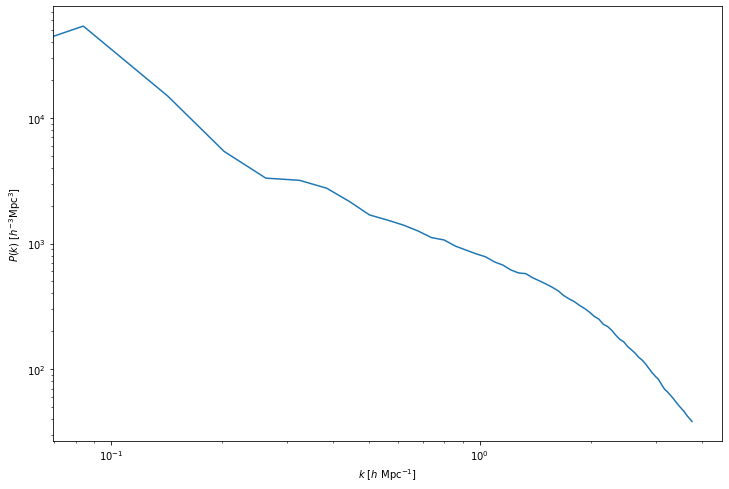

In [29]:
plt.figure(figsize=(12,8))
# print the shot noise subtracted P(k)
plt.loglog((Pk['k']) * 1e3, (Pk['power'].real - Pk.attrs['shotnoise'])*1e-9) #Illustris units are kpc we need to convert to Mpc

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
